In [1]:
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
!unzip emergency_vs_non-emergency_dataset.zip

Archive:  emergency_vs_non-emergency_dataset.zip
   creating: emergency_vs_non-emergency_dataset/
  inflating: emergency_vs_non-emergency_dataset/emergency_train.csv  
   creating: emergency_vs_non-emergency_dataset/images/
  inflating: emergency_vs_non-emergency_dataset/images/1265.jpg  
  inflating: emergency_vs_non-emergency_dataset/images/1260.jpg  
  inflating: emergency_vs_non-emergency_dataset/images/1259.jpg  
  inflating: emergency_vs_non-emergency_dataset/images/1256.jpg  
  inflating: emergency_vs_non-emergency_dataset/images/1255.jpg  
  inflating: emergency_vs_non-emergency_dataset/images/125.jpg  
  inflating: emergency_vs_non-emergency_dataset/images/1249.jpg  
  inflating: emergency_vs_non-emergency_dataset/images/1247.jpg  
  inflating: emergency_vs_non-emergency_dataset/images/1245.jpg  
  inflating: emergency_vs_non-emergency_dataset/images/1243.jpg  
  inflating: emergency_vs_non-emergency_dataset/images/1242.jpg  
  inflating: emergency_vs_non-emergency_dataset/ima

In [3]:
df = pd.read_csv('data/train.csv')
images = []
for image_name in tqdm(df['image_names']):
                image = 'data/images/' + str(image_name)
                # reading images using opencv
                image = cv2.imread(image)
                # resizing the image as height 224 and width 224
                image_resized = cv2.resize(image,(224,224))
                # appending image to the images list
                images.append(np.array(image,'float32'))

100%|██████████| 1646/1646 [00:02<00:00, 786.84it/s]


In [4]:
labels = df['emergency_or_not'].values
images = np.array(images)/255.0
labels = np.array(labels)

images = np.reshape(images,(images.shape[0],224,224,3))
labels = to_categorical(labels)

In [5]:
def plot(index):
  plt.imshow(images[index])
  if (df['emergency_or_not'][index]== 1):
    print("Emergency Vehicles ")
  else:
    print("Non-emergency Vehicles")

Emergency Vehicles 


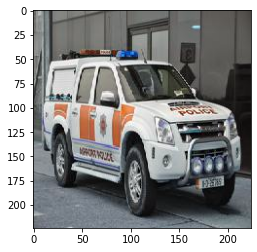

In [6]:
plot(10)

In [7]:
vgg = VGG16(include_top=False,weights='imagenet',input_shape=[224,224,3])

58892288/58889256 [==============================] - 0s 0us/step


In [8]:
for layer in vgg.layers:
  layer.trainable = False

In [9]:
x = Flatten()(vgg.output)
pred = Dense(2,activation='softmax')(x)
model = Model(inputs=vgg.input,outputs=pred)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
BATCH_SIZE = 32
EPOCHS = 20       

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


checkpoint = ModelCheckpoint('vehicles_model.h5',monitor='val_loss',verbose=0,
                            save_best_only='True',mode='auto')

history = model.fit(images,labels,batch_size=BATCH_SIZE,
                    callbacks=[checkpoint],epochs=EPOCHS,
                    validation_split = 0.2)

Epoch 1/20
42/42 [==============================] - 18s 426ms/step - loss: 0.5423 - accuracy: 0.7857 - val_loss: 0.3240 - val_accuracy: 0.8636
Epoch 2/20
42/42 [==============================] - 15s 359ms/step - loss: 0.1509 - accuracy: 0.9476 - val_loss: 0.2361 - val_accuracy: 0.9182
Epoch 3/20
42/42 [==============================] - 15s 357ms/step - loss: 0.1092 - accuracy: 0.9643 - val_loss: 0.2981 - val_accuracy: 0.8758
Epoch 4/20
42/42 [==============================] - 15s 356ms/step - loss: 0.0505 - accuracy: 0.9909 - val_loss: 0.2514 - val_accuracy: 0.9121
Epoch 5/20
42/42 [==============================] - 15s 360ms/step - loss: 0.0324 - accuracy: 0.9954 - val_loss: 0.2281 - val_accuracy: 0.9303
Epoch 6/20
42/42 [==============================] - 15s 356ms/step - loss: 0.0278 - accuracy: 0.9970 - val_loss: 0.3094 - val_accuracy: 0.8970
Epoch 7/20
42/42 [==============================] - 15s 356ms/step - loss: 0.0192 - accuracy: 0.9970 - val_loss: 0.2421 - val_accuracy: 0.9121

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


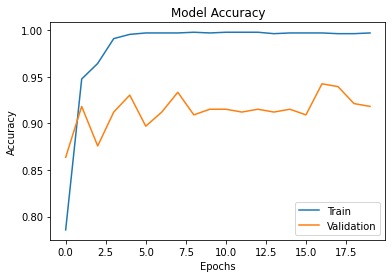

In [12]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train","Validation"],loc = 'upper_left')



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


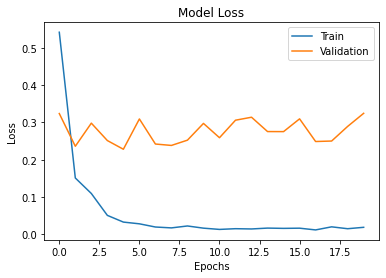

In [13]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Train","Validation"],loc = 'upper_left')